In [56]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

In [2]:
t = torch.rand(8,4)
data_loader = DataLoader(t, batch_size = 2, drop_last = False)
for (i, batch) in enumerate(data_loader, 1):
    print(f'Batch {i}', batch)


Batch 1 tensor([[0.2353, 0.2091, 0.0824, 0.6943],
        [0.6934, 0.0930, 0.6006, 0.2243]])
Batch 2 tensor([[0.2455, 0.9995, 0.6052, 0.1481],
        [0.6448, 0.0877, 0.0251, 0.9881]])
Batch 3 tensor([[0.5601, 0.7944, 0.4472, 0.4998],
        [0.6367, 0.7676, 0.0102, 0.8888]])
Batch 4 tensor([[0.8453, 0.8025, 0.1481, 0.2880],
        [0.7378, 0.1766, 0.5985, 0.5706]])


In [3]:
#apparently, DataLoader iterates over the rows of the input tensor, which is the same behavior as when we iterate over the tensor itself
t_r = torch.reshape(t, [4, 8])
data_loader = DataLoader(t_r, batch_size = 2, drop_last = False)
for (i, batch) in enumerate(data_loader, 1):
    print(f'Batch {i}', batch)

print()

for (i, row) in enumerate(t_r, 1):
    print(f'Row: {i}', row)


Batch 1 tensor([[0.2353, 0.2091, 0.0824, 0.6943, 0.6934, 0.0930, 0.6006, 0.2243],
        [0.2455, 0.9995, 0.6052, 0.1481, 0.6448, 0.0877, 0.0251, 0.9881]])
Batch 2 tensor([[0.5601, 0.7944, 0.4472, 0.4998, 0.6367, 0.7676, 0.0102, 0.8888],
        [0.8453, 0.8025, 0.1481, 0.2880, 0.7378, 0.1766, 0.5985, 0.5706]])

Row: 1 tensor([0.2353, 0.2091, 0.0824, 0.6943, 0.6934, 0.0930, 0.6006, 0.2243])
Row: 2 tensor([0.2455, 0.9995, 0.6052, 0.1481, 0.6448, 0.0877, 0.0251, 0.9881])
Row: 3 tensor([0.5601, 0.7944, 0.4472, 0.4998, 0.6367, 0.7676, 0.0102, 0.8888])
Row: 4 tensor([0.8453, 0.8025, 0.1481, 0.2880, 0.7378, 0.1766, 0.5985, 0.5706])


In [63]:
from torch.utils.data import TensorDataset

torch.manual_seed(1)
t_x = torch.rand(8, 4)
t_y = torch.arange(8)
print(t_x.shape)
print(t_y.shape)
joint_dataset = TensorDataset(t_x, t_y)
print(joint_dataset[1]) #returns a tuple of a single row of x and a single element of y


torch.Size([8, 4])
torch.Size([8])
(tensor([0.0293, 0.7999, 0.3971, 0.7544]), tensor(1))


In [5]:
joint_data_loader = DataLoader(joint_dataset, batch_size = 2, shuffle = True, drop_last = False)
for (i, batch) in enumerate(joint_data_loader, 1):
    print()
    print(f'Batch {i} x:', batch[0])
    print(f'Batch {i} y:', batch[1])


Batch 1 x: tensor([[0.3138, 0.1980, 0.4162, 0.2843],
        [0.5725, 0.4980, 0.9371, 0.6556]])
Batch 1 y: tensor([5, 4])

Batch 2 x: tensor([[0.7576, 0.2793, 0.4031, 0.7347],
        [0.0112, 0.8100, 0.6397, 0.9743]])
Batch 2 y: tensor([0, 7])

Batch 3 x: tensor([[0.5695, 0.4388, 0.6387, 0.5247],
        [0.0293, 0.7999, 0.3971, 0.7544]])
Batch 3 y: tensor([2, 1])

Batch 4 x: tensor([[0.3398, 0.5239, 0.7981, 0.7718],
        [0.6826, 0.3051, 0.4635, 0.4550]])
Batch 4 y: tensor([6, 3])


In [6]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(joint_data_loader, 1):
        print(f'Batch {i} x:', batch[0])
        print(f'Batch {i} y:', batch[1])


epoch 1
Batch 1 x: tensor([[0.3138, 0.1980, 0.4162, 0.2843],
        [0.5695, 0.4388, 0.6387, 0.5247]])
Batch 1 y: tensor([5, 2])
Batch 2 x: tensor([[0.0112, 0.8100, 0.6397, 0.9743],
        [0.5725, 0.4980, 0.9371, 0.6556]])
Batch 2 y: tensor([7, 4])
Batch 3 x: tensor([[0.6826, 0.3051, 0.4635, 0.4550],
        [0.0293, 0.7999, 0.3971, 0.7544]])
Batch 3 y: tensor([3, 1])
Batch 4 x: tensor([[0.3398, 0.5239, 0.7981, 0.7718],
        [0.7576, 0.2793, 0.4031, 0.7347]])
Batch 4 y: tensor([6, 0])
epoch 2
Batch 1 x: tensor([[0.6826, 0.3051, 0.4635, 0.4550],
        [0.3398, 0.5239, 0.7981, 0.7718]])
Batch 1 y: tensor([3, 6])
Batch 2 x: tensor([[0.7576, 0.2793, 0.4031, 0.7347],
        [0.3138, 0.1980, 0.4162, 0.2843]])
Batch 2 y: tensor([0, 5])
Batch 3 x: tensor([[0.5695, 0.4388, 0.6387, 0.5247],
        [0.0112, 0.8100, 0.6397, 0.9743]])
Batch 3 y: tensor([2, 7])
Batch 4 x: tensor([[0.0293, 0.7999, 0.3971, 0.7544],
        [0.5725, 0.4980, 0.9371, 0.6556]])
Batch 4 y: tensor([1, 4])


In [7]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)


['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


In [53]:
from sklearn.datasets import fetch_openml

X_np, y_np = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame=False, parser='auto')
print(type(X_np))
print(type(y_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.int64))
print(type(X))
print(X.dtype)
print(X.shape)
print(type(y))
print(y.dtype)
print(y.shape)

<class 'torch.Tensor'>
torch.float32
torch.Size([70000, 784])
<class 'torch.Tensor'>
torch.int64
torch.Size([70000])


56000
14000


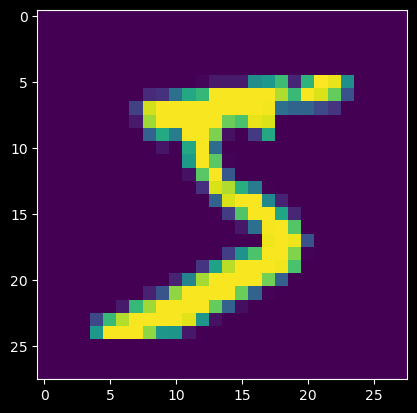

In [85]:
mnist_dataset = TensorDataset(X, y)
example, label = mnist_dataset[0]
plt.imshow(example.reshape(28, 28))

train_split_fraction = 0.2
train_len = int(train_split_fraction * len(mnist_dataset))
test_len = len(mnist_dataset) - train_len
mnist_train_dataset, mnist_test_dataset = torch.utils.data.random_split(mnist_dataset, (test_len, train_len))
print(len(mnist_train_dataset))
print(len(mnist_test_dataset))

In [86]:
mnist_batch_size = 10
mnist_sample_loader = DataLoader(mnist_train_dataset, batch_size = mnist_batch_size, shuffle = True, drop_last = False)
for (i, batch) in enumerate(mnist_sample_loader, 0):
    if i%1000 == 0:
        print(f"Batch number {i} contains {mnist_batch_size} examples with labels {batch[1]}")

Batch number 0 contains 10 examples with labels tensor([8, 6, 4, 8, 3, 0, 2, 1, 5, 1])
Batch number 1000 contains 10 examples with labels tensor([6, 6, 4, 7, 6, 7, 5, 2, 3, 6])
Batch number 2000 contains 10 examples with labels tensor([9, 4, 0, 0, 8, 2, 4, 3, 8, 8])
Batch number 3000 contains 10 examples with labels tensor([7, 7, 2, 8, 0, 3, 4, 3, 4, 3])
Batch number 4000 contains 10 examples with labels tensor([7, 0, 6, 3, 4, 5, 2, 5, 8, 3])
Batch number 5000 contains 10 examples with labels tensor([8, 0, 1, 7, 1, 4, 0, 8, 1, 5])
